In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import collections
from sklearn import metrics

In [2]:
full_dataset = pd.read_csv('wine-clustering.csv')
full_dataset.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


First transformation: normalizing the dataset

In [3]:
full_dataset_transformed = Normalizer().fit_transform(full_dataset.values)
pd.DataFrame(full_dataset_transformed,columns=full_dataset.columns).describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,0.019950,0.003711,0.003644,0.031124,0.151541,0.003444,0.002973,0.000581,0.002396,0.007342,0.001477,0.003993,0.986018
std,0.007321,0.002499,0.001409,0.014671,0.054081,0.001543,0.001802,0.000327,0.001249,0.003843,0.000736,0.001979,0.010073
min,0.008428,0.000944,0.001473,0.007739,0.064147,0.001255,0.000637,0.000145,0.000554,0.002241,0.000579,0.001675,0.951812
25%,0.013548,0.001684,0.002359,0.017615,0.109775,0.002385,0.001746,0.000277,0.001515,0.004612,0.000970,0.002535,0.981687
50%,0.018984,0.003174,0.003468,0.030036,0.146777,0.002946,0.002721,0.000514,0.002030,0.005981,0.001232,0.003384,0.988441
75%,0.024783,0.004981,0.004506,0.040010,0.183082,0.003886,0.003551,0.000833,0.003040,0.008853,0.001834,0.004870,0.993564
max,0.041106,0.014852,0.007305,0.069703,0.297958,0.008404,0.010560,0.002008,0.007469,0.021876,0.004727,0.010858,0.997835


In [4]:
full_dataset_transformed = StandardScaler().fit_transform(full_dataset.values)
pd.DataFrame(full_dataset_transformed,columns=full_dataset.columns).describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02
mean,-8.619821e-16,-8.357859e-17,-8.657245e-16,-1.160121e-16,-1.995907e-17,-2.972030e-16,-4.016762e-16,4.079134e-16,-1.699639e-16,-1.122697e-17,3.717376e-16,2.919013e-16,-7.484650e-18
std,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00
min,-2.434235e+00,-1.432983e+00,-3.679162e+00,-2.671018e+00,-2.088255e+00,-2.107246e+00,-1.695971e+00,-1.868234e+00,-2.069034e+00,-1.634288e+00,-2.094732e+00,-1.895054e+00,-1.493188e+00
25%,-7.882448e-01,-6.587486e-01,-5.721225e-01,-6.891372e-01,-8.244151e-01,-8.854682e-01,-8.275393e-01,-7.401412e-01,-5.972835e-01,-7.951025e-01,-7.675624e-01,-9.522483e-01,-7.846378e-01
50%,6.099988e-02,-4.231120e-01,-2.382132e-02,1.518295e-03,-1.222817e-01,9.595986e-02,1.061497e-01,-1.760948e-01,-6.289785e-02,-1.592246e-01,3.312687e-02,2.377348e-01,-2.337204e-01
75%,8.361286e-01,6.697929e-01,6.981085e-01,6.020883e-01,5.096384e-01,8.089974e-01,8.490851e-01,6.095413e-01,6.291754e-01,4.939560e-01,7.131644e-01,7.885875e-01,7.582494e-01
max,2.259772e+00,3.109192e+00,3.156325e+00,3.154511e+00,4.371372e+00,2.539515e+00,3.062832e+00,2.402403e+00,3.485073e+00,3.435432e+00,3.301694e+00,1.960915e+00,2.971473e+00


There are two different normalized datasets to use. The first, using the Normalizer() and, the second one, using StandardScaler

In [5]:
full_dataset_Normalizer = Normalizer().fit_transform(full_dataset.values)
full_dataset_StandardScaler = StandardScaler().fit_transform(full_dataset.values)

In [6]:
kmeans = KMeans(n_clusters = 3, n_init = 3, max_iter = 500)
Y_pred_Normalizer = kmeans.fit_predict(full_dataset_Normalizer)
Y_pred_StandardScaler = kmeans.fit_predict(full_dataset_StandardScaler)

In [7]:
full_dataset_with_clusters = full_dataset.copy()
full_dataset_with_clusters['Normalizer'] = Y_pred_Normalizer
full_dataset_with_clusters['StandardScaler'] = Y_pred_StandardScaler

We can see how both normalized models impact the clustering process

In [9]:
full_dataset_with_clusters[['Normalizer','StandardScaler']]

,Normalizer,StandardScaler
0,2,0
1,2,0
2,2,0
3,2,0
4,0,0
...,...,...
173,0,1
174,0,1
175,0,1
176,0,1


In [10]:
print(collections.Counter(full_dataset_with_clusters['Normalizer']))
print(collections.Counter(full_dataset_with_clusters['StandardScaler']))

Counter({0: 81, 2: 60, 1: 37})
Counter({2: 66, 0: 61, 1: 51})


We can estimate how good the clusters are by some metrics:

In [11]:
silhouette_normalizer = metrics.silhouette_score(full_dataset_Normalizer,Y_pred_Normalizer)
print(silhouette_normalizer)
silhouette_standardscaler = metrics.silhouette_score(full_dataset_StandardScaler,Y_pred_StandardScaler)
print(silhouette_standardscaler)

0.5233461282286351
0.28594199657074876


The silhouette is between -1 and 1. If silhouette > 0, the cluster is considered good

In [12]:
davies_bouldin_normalizer = metrics.davies_bouldin_score(full_dataset_Normalizer,Y_pred_Normalizer)
print(davies_bouldin_normalizer)
davies_bouldin_standardscaler = metrics.davies_bouldin_score(full_dataset_StandardScaler,Y_pred_StandardScaler)
print(davies_bouldin_standardscaler)

0.6080816722167656
1.391793832317738


The Davies Bouldin Score is better when close to zero

In [13]:
calinski_normalizer = metrics.calinski_harabasz_score(full_dataset_Normalizer,Y_pred_Normalizer)
print(calinski_normalizer)
calinski_standardscaler = metrics.calinski_harabasz_score(full_dataset_StandardScaler,Y_pred_StandardScaler)
print(calinski_standardscaler)

412.88607727974585
70.83688657175372


The Calinski Score must be as high as possible

In [14]:
# full_dataset_Normalizer
# full_dataset_StandardScaler


def iteration_cluster(n_cluster,n_init,max_iter):
    kmeans = KMeans(n_clusters = n_cluster, n_init = n_init, max_iter = max_iter)
    Y_pred_Normalizer = kmeans.fit_predict(full_dataset_Normalizer)
    Y_pred_StandardScaler = kmeans.fit_predict(full_dataset_StandardScaler)

    print('n_clusters:',n_cluster)
    print('n_init:',n_init)
    print('max_iter:',max_iter)

    print("Silhouette")
    silhouette_normalizer = metrics.silhouette_score(full_dataset_Normalizer,Y_pred_Normalizer)
    print("Normalizer",silhouette_normalizer)
    silhouette_standardscaler = metrics.silhouette_score(full_dataset_StandardScaler,Y_pred_StandardScaler)
    print("StandardScaler",silhouette_standardscaler)

    print("Davies Bouldin")
    davies_bouldin_normalizer = metrics.davies_bouldin_score(full_dataset_Normalizer,Y_pred_Normalizer)
    print("Normalizer",davies_bouldin_normalizer)
    davies_bouldin_standardscaler = metrics.davies_bouldin_score(full_dataset_StandardScaler,Y_pred_StandardScaler)
    print("StandardScaler",davies_bouldin_standardscaler)

    print("Calinski")
    calinski_normalizer = metrics.calinski_harabasz_score(full_dataset_Normalizer,Y_pred_Normalizer)
    print("Normalizer",calinski_normalizer)
    calinski_standardscaler = metrics.calinski_harabasz_score(full_dataset_StandardScaler,Y_pred_StandardScaler)
    print("StandardScaler",calinski_standardscaler)

    return [n_cluster,silhouette_normalizer,davies_bouldin_normalizer,calinski_normalizer],[n_cluster,silhouette_standardscaler,davies_bouldin_standardscaler,calinski_standardscaler]


In [15]:
norms = []
stans = []

for i in np.arange(2,10):
    norm,stan = iteration_cluster(i,10,1000)
    norms.append(norm)
    stans.append(stan)

n_clusters: 2
n_init: 10
max_iter: 1000
Silhouette
Normalizer 0.5381503708882504
StandardScaler 0.26831340971052126
Davies Bouldin
Normalizer 0.6435043277084156
StandardScaler 1.4482356342193665
Calinski
Normalizer 315.67039297820486
StandardScaler 69.48646422404195
n_clusters: 3
n_init: 10
max_iter: 1000
Silhouette
Normalizer 0.5233461282286351
StandardScaler 0.2848589191898987
Davies Bouldin
Normalizer 0.6080816722167656
StandardScaler 1.389187977718165
Calinski
Normalizer 412.88607727974585
StandardScaler 70.94000800315118
n_clusters: 4
n_init: 10
max_iter: 1000
Silhouette
Normalizer 0.5179954062692879
StandardScaler 0.24867713814255363
Davies Bouldin
Normalizer 0.5857720179576993
StandardScaler 1.7515956466338918
Calinski
Normalizer 520.4006396842462
StandardScaler 55.66838907291401
n_clusters: 5
n_init: 10
max_iter: 1000
Silhouette
Normalizer 0.4939024982435686
StandardScaler 0.23616126001024113
Davies Bouldin
Normalizer 0.6222224115454145
StandardScaler 1.6931447342044628
Calinsk

In [16]:
pd.DataFrame(norms,columns = ['n_cluster','silhouette_normalizer','davies_bouldin_normalizer','calinski_normalizer'])

,n_cluster,silhouette_normalizer,davies_bouldin_normalizer,calinski_normalizer
0,2,0.538150,0.643504,315.670393
1,3,0.523346,0.608082,412.886077
2,4,0.517995,0.585772,520.400640
3,5,0.493902,0.622222,598.954264
4,6,0.451317,0.678859,614.758545
5,7,0.427753,0.683321,596.738263
6,8,0.420769,0.719008,591.062579
7,9,0.395872,0.782189,584.057066


In [17]:
pd.DataFrame(stans,columns = ['n_cluster','silhouette_standardscaler','davies_bouldin_standardscaler','calinski_standardscaler'])

,n_cluster,silhouette_standardscaler,davies_bouldin_standardscaler,calinski_standardscaler
0,2,0.268313,1.448236,69.486464
1,3,0.284859,1.389188,70.940008
2,4,0.248677,1.751596,55.668389
3,5,0.236161,1.693145,47.254645
4,6,0.190581,1.879320,41.811189
5,7,0.229558,1.513853,37.821924
6,8,0.157886,1.685588,34.784293
7,9,0.139330,1.763782,32.461528


The silhouette should be above 0 and as close to 1 as possible, the Davies Bouldin should be as close to 0 as possible, and Calinski should be the highest number possible. Therefore, testing multiple cluster numbers for both models, it's clear that we should keep using only the Normalizer() model.

In [24]:
kmeans = KMeans(n_clusters = 3, n_init = 10, max_iter = 1000)
Y_pred_Normalizer = kmeans.fit_predict(full_dataset_Normalizer)
Y_pred_Normalizer

array([1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 0, 0, 2,
       2, 2, 2, 0, 1, 0, 2, 2, 1, 0, 0, 0, 2, 0, 0, 1, 2, 2, 2, 0, 2, 2,
       1, 1, 2, 2, 2, 0, 0, 2, 0, 2, 2, 0, 2, 2, 0, 0, 2, 0, 2, 2, 0, 2,
       2, 0, 2, 0, 0, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2,
       2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 0, 0, 0, 0, 2,
       2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [26]:
dataset_plot_graphs = pd.DataFrame(full_dataset_Normalizer,columns=full_dataset.columns)
dataset_plot_graphs['Cluster'] = Y_pred_Normalizer
dataset_plot_graphs

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Cluster
0,0.013264,0.001594,0.002265,0.014542,0.118383,0.002610,0.002852,0.000261,0.002135,0.005257,0.000969,0.003654,0.992738,1
1,0.012513,0.001687,0.002029,0.010617,0.094794,0.002512,0.002616,0.000246,0.001213,0.004152,0.000995,0.003223,0.995336,1
2,0.011063,0.001984,0.002245,0.015636,0.084906,0.002354,0.002724,0.000252,0.002362,0.004775,0.000866,0.002665,0.996176,1
3,0.009680,0.001314,0.001684,0.011317,0.076119,0.002593,0.002351,0.000162,0.001468,0.005254,0.000579,0.002324,0.996961,1
4,0.017775,0.003477,0.003853,0.028193,0.158418,0.003759,0.003611,0.000524,0.002443,0.005800,0.001396,0.003934,0.986753,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.018364,0.007568,0.003282,0.027460,0.127252,0.002250,0.000817,0.000697,0.001420,0.010314,0.000857,0.002331,0.991225,2
174,0.017691,0.005162,0.003274,0.030366,0.134666,0.002376,0.000990,0.000568,0.001862,0.009638,0.000924,0.002060,0.990194,2
175,0.015723,0.005071,0.002678,0.023697,0.142180,0.001884,0.000818,0.000509,0.001600,0.012085,0.000699,0.001848,0.989336,2
176,0.015514,0.003051,0.002792,0.023559,0.141355,0.001944,0.000801,0.000624,0.001720,0.010955,0.000707,0.001908,0.989482,2


In [28]:
dataset_plot_graphs.groupby('Cluster').mean()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
Cluster,,,,,,,,,,,,,
0,0.029882,0.005409,0.005564,0.050587,0.232477,0.005615,0.005276,0.000858,0.003864,0.008473,0.002439,0.006631,0.970068
1,0.012616,0.001865,0.002259,0.016755,0.094992,0.002466,0.002451,0.000293,0.001641,0.004845,0.000965,0.002800,0.995063
2,0.020847,0.004303,0.003794,0.032878,0.156458,0.003176,0.002307,0.000668,0.002285,0.008675,0.001418,0.003673,0.986604


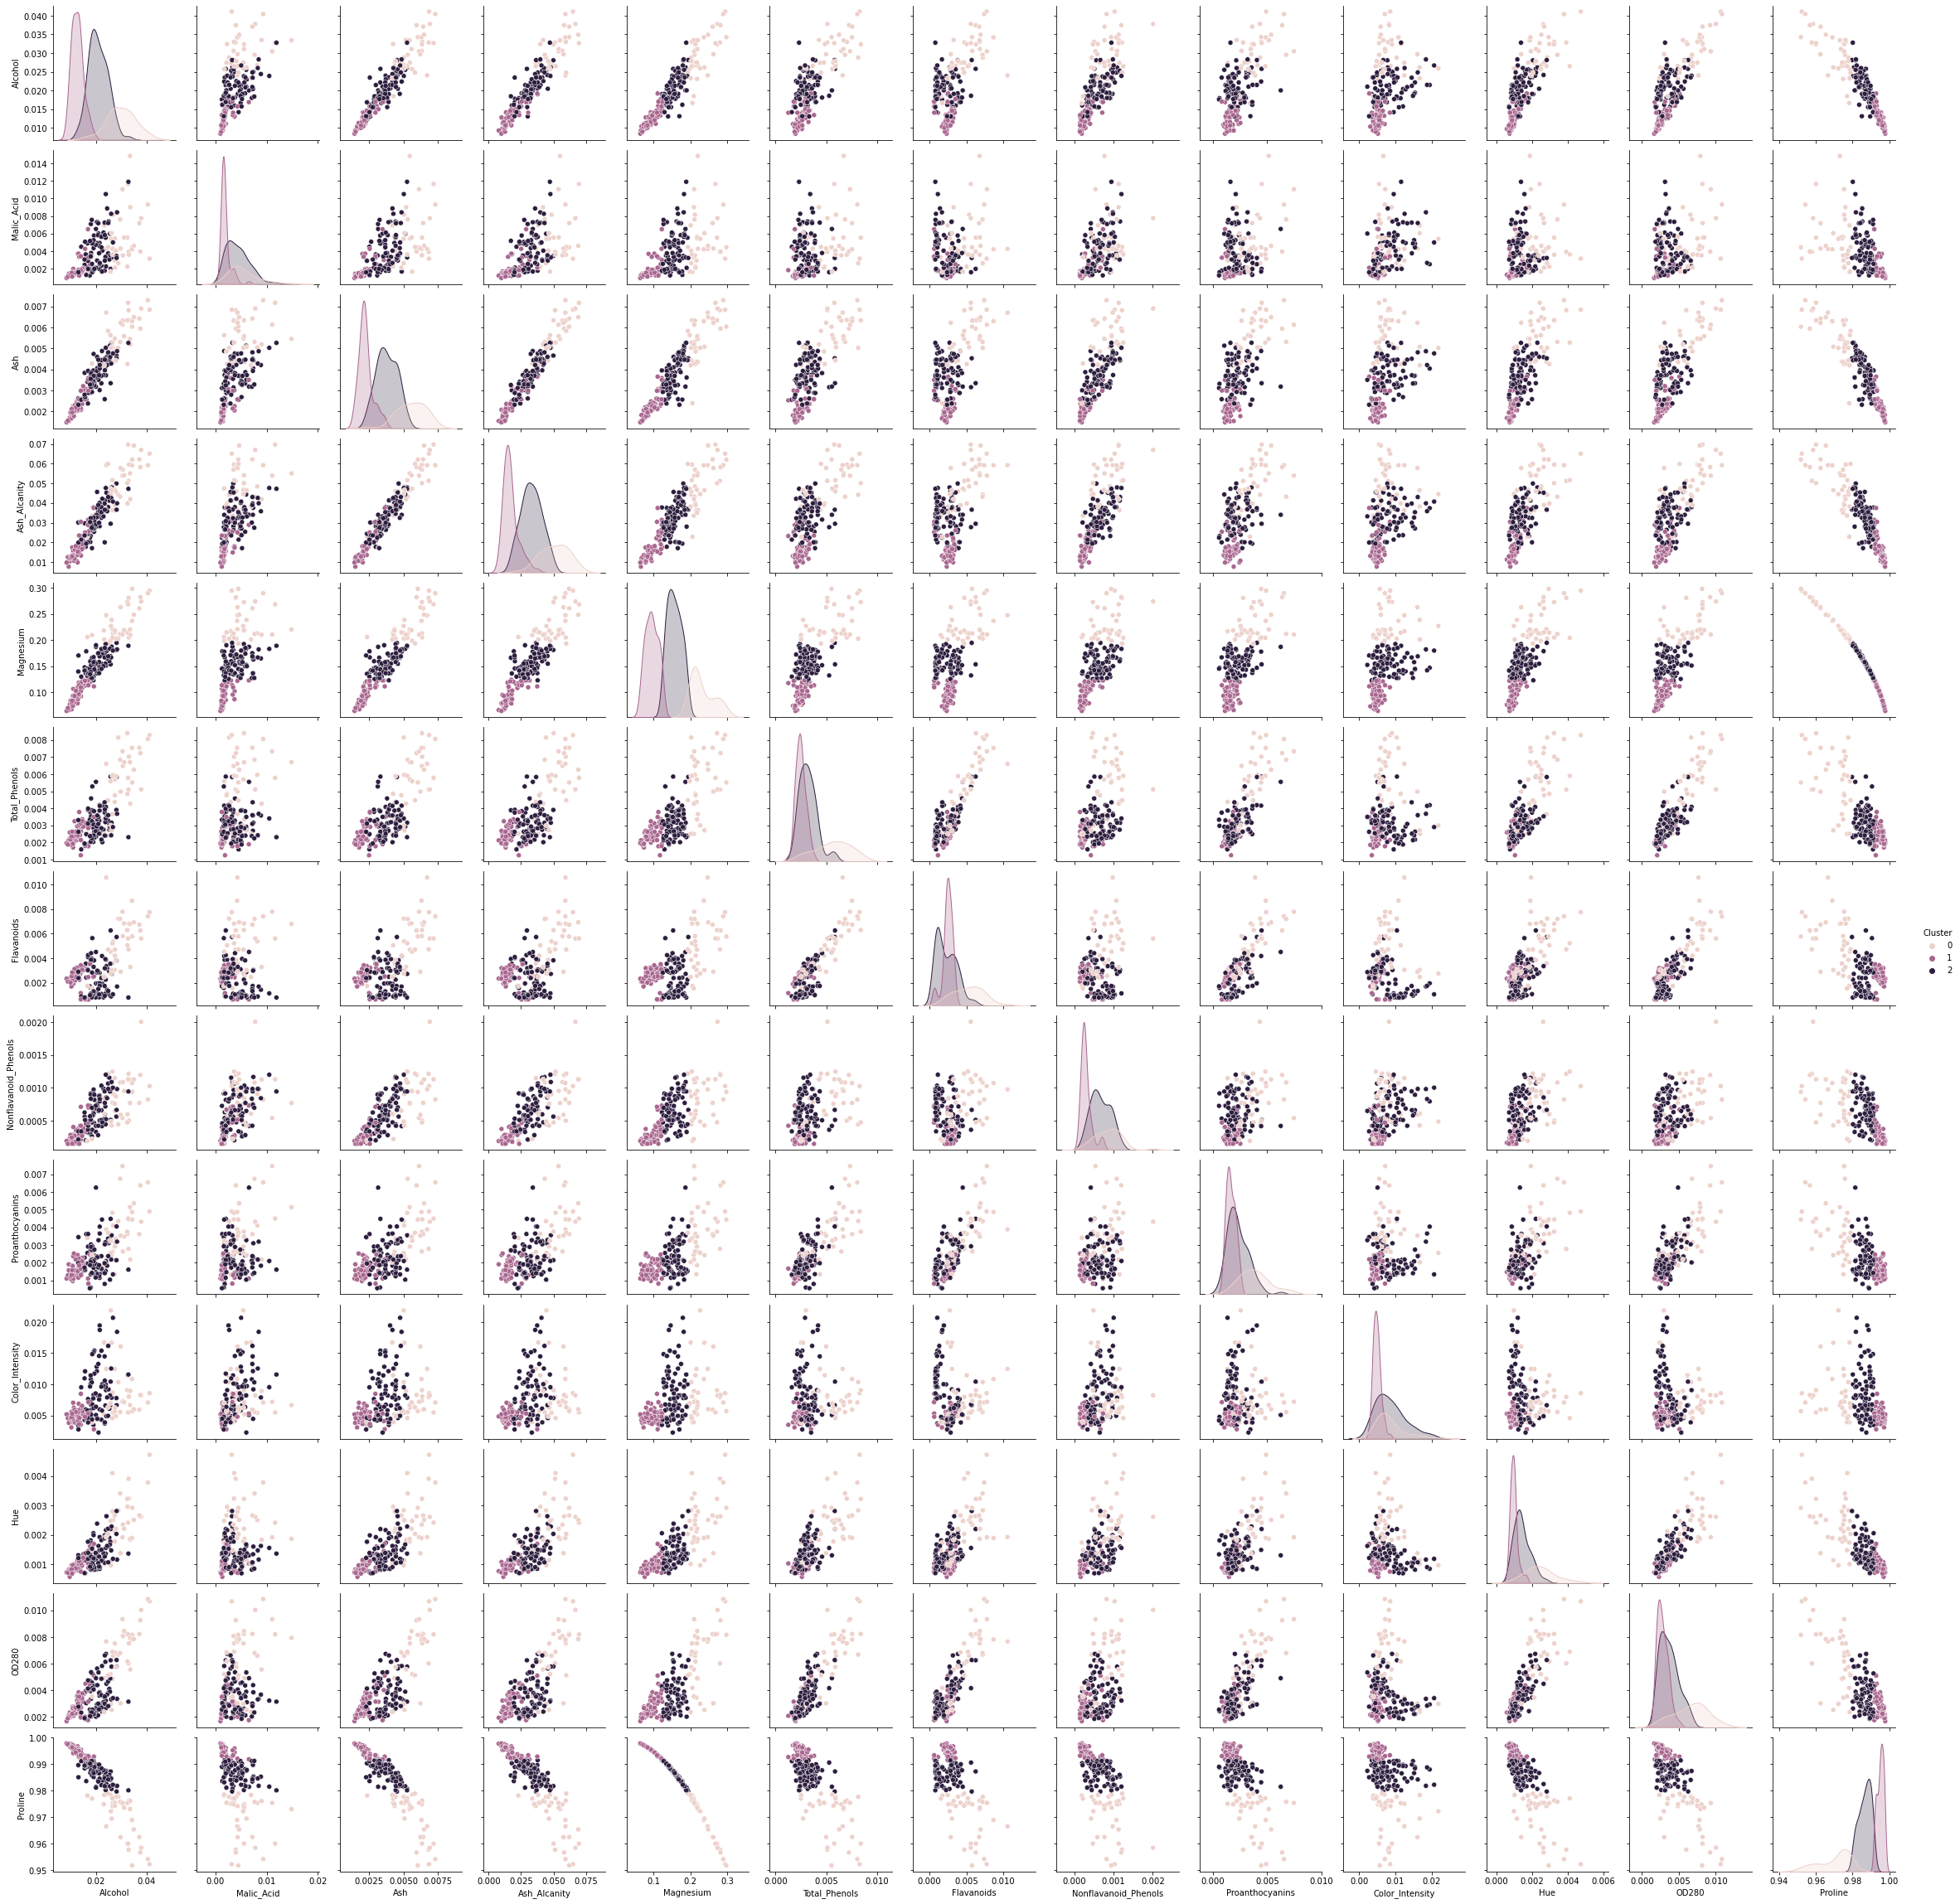

In [29]:
sns.pairplot(dataset_plot_graphs[:],hue='Cluster')